In [3]:
import Pkg;
Pkg.add("CSV")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed MKL_jll ──────────── v2021.1.1+2
   Installed CodecZlib ────────── v0.7.0
   Installed WeakRefStrings ───── v1.3.0
   Installed SentinelArrays ───── v1.3.7
   Installed FilePathsBase ────── v0.9.11
   Installed TranscodingStreams ─ v0.9.6
   Installed CSV ──────────────── v0.9.4
    Updating `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] + CSV v0.9.4
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [336ed68f] + CSV v0.9.4
  [944b1d66] + CodecZlib v0.7.0
  [48062228] + FilePathsBase v0.9.11
  [91c51154] + SentinelArrays v1.3.7
  [3bb67fe8] + TranscodingStreams v0.9.6
  [ea10d353] + WeakRefStrings v1.3.0
  [856f044c] ↑ MKL_jll v2021.1.1+1 ⇒ v2021.1.1+2
Precompiling project...
  ✓ TranscodingStreams
  ✓ MKL_jll
  ✓ SentinelArrays
  ✓ CodecZlib
  ✓ FilePathsBase
  ✓ WeakRefStrings
  ✓ CSV
  ✓ FFTW
  ✓ FFTViews
  ✓ DSP
  ✓ MIRTjim
  11 dependencies successfully precompiled i

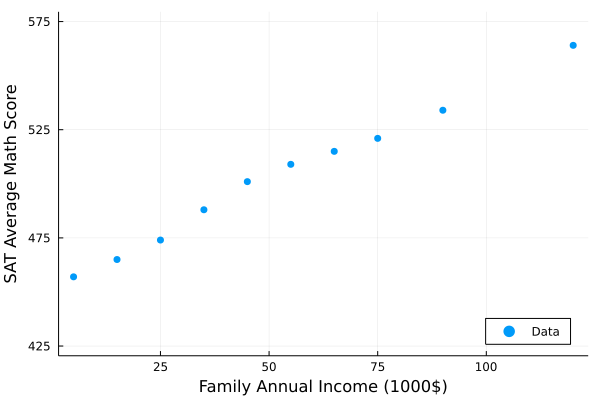

In [84]:
using CSV # you might need to add this Package
using Plots; default(markerstrokecolor=:auto)
data = CSV.File("hpj4s.csv", normalizenames=true, transpose=true)
math = data.Math # math scores from the file (should be from 457 to 564)
income = [5:10:75; 90; 120]
scatter(income, math, label="Data", ylim=[425,575], ytick=425:50:575)
plot!(xlabel = "Family Annual Income (1000\$)")
plot!(ylabel = "SAT Average Math Score", legend = :bottomright)

In [8]:
display(income)

10-element Vector{Int64}:
   5
  15
  25
  35
  45
  55
  65
  75
  90
 120

In [9]:
display(math)

10-element Vector{Int64}:
 457
 465
 474
 488
 501
 509
 515
 521
 534
 564

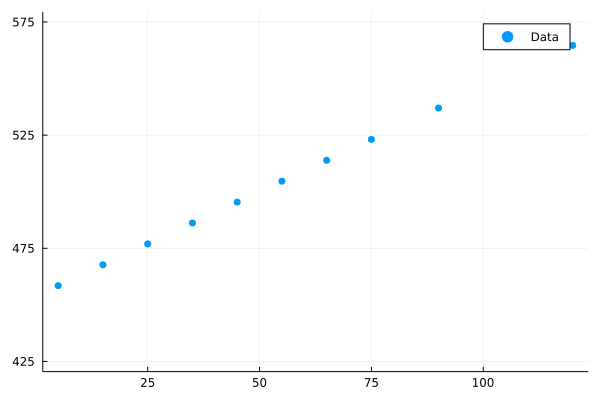

In [74]:
function constant_model(x, y)
    A = ones(length(x))
    b = y
 
    x = inv(A' * A) * A' * b
    newmath = zeros(length(newincome)) .+ x
    
    return A, b, x , newmath
end 


function linear_model(x, y)
    A = x
    b = y
    x = inv(A' * A) * A' * b
    
    newmath = newincome * x[1] 
    return A, b, x , newmath
end 

function affine_model(x, y)
    A = hcat(x, ones(length(x)))
    b = y
    x = inv(A' * A) * A' * b
    newmath = newincome * x[1] .+x[2]
    
    return A, b, x , newmath
end 

function quadratic_model(x, y)
    A = hcat(x.^2, x, ones(length(x)))
    b = y
    x = inv(A' * A) * A' * b
    newmath  = newincome .^2 * x[1] + newincome * x[2] .+ x[3]
    
    return A, b, x , newmath
end 

quadratic_model (generic function with 1 method)

In [75]:
A, b,x, newmath1= constant_model(income, math)
display(x)
display(newmath1)

502.80000000000007

131-element Vector{Float64}:
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
   ⋮
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007
 502.80000000000007

In [76]:
A, b,x, newmath2= linear_model(income, math)
display(x)
display(newmath2)

7.013164556962026

131-element Vector{Float64}:
   0.0
   7.013164556962026
  14.026329113924051
  21.039493670886078
  28.052658227848102
  35.06582278481013
  42.078987341772155
  49.09215189873418
  56.105316455696205
  63.11848101265823
  70.13164556962026
  77.14481012658229
  84.15797468354431
   ⋮
 834.5665822784811
 841.5797468354431
 848.5929113924051
 855.6060759493671
 862.6192405063291
 869.6324050632911
 876.6455696202532
 883.6587341772153
 890.6718987341773
 897.6850632911393
 904.6982278481013
 911.7113924050633

In [77]:
A, b,x, newmath3= affine_model(income, math)
display(x)
display(newmath3)

2-element Vector{Float64}:
   0.923400525854515
 453.85977212971073

131-element Vector{Float64}:
 453.85977212971073
 454.78317265556524
 455.70657318141974
 456.6299737072743
 457.5533742331288
 458.4767747589833
 459.4001752848378
 460.3235758106923
 461.2469763365469
 462.1703768624014
 463.0937773882559
 464.0171779141104
 464.9405784399649
   ⋮
 563.744434706398
 564.6678352322525
 565.591235758107
 566.5146362839615
 567.4380368098161
 568.3614373356706
 569.2848378615251
 570.2082383873797
 571.1316389132342
 572.0550394390887
 572.9784399649432
 573.9018404907977

In [78]:
A, b,x, newmath4= quadratic_model(income, math)
display(x)
display(newmath4)

3-element Vector{Float64}:
  -0.0011169658642307817
   1.0584447335413572
 451.11444428602084

131-element Vector{Float64}:
 451.11444428602084
 452.17177205369796
 453.22686588964666
 454.2797257938668
 455.3303517663586
 456.37874380712185
 457.42490191615667
 458.468826093463
 459.5105163390409
 460.54997265289035
 461.58719503501135
 462.62218348540387
 463.6549380040679
   ⋮
 561.2520139740702
 562.0435038660604
 562.8327598263222
 563.6197818548554
 564.4045699516603
 565.1871241167366
 565.9674443500845
 566.7455306517039
 567.5213830215949
 568.2950014597575
 569.0663859661915
 569.835536540897

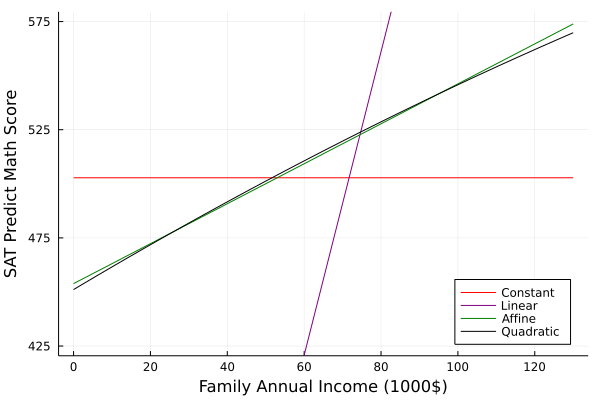

In [93]:
A, b,x, newmath1= constant_model(income, math)
A, b,x, newmath2= linear_model(income, math)
A, b,x, newmath3= affine_model(income, math)
A, b,x, newmath4= quadratic_model(income, math)
newincome = [0:1:130;]
plot(newincome, newmath1, label = "Constant", color = "red", ylim=[425,575], ytick=425:50:575,xlims=[0:130])
plot!(newincome, newmath2, label = "Linear", color = "purple")
plot!(newincome, newmath3, label = "Affine", color = "green")
plot!(newincome, newmath4, label = "Quadratic", color = "black")
plot!(xlabel = "Family Annual Income (1000\$)")
plot!(ylabel = "SAT Predict Math Score", legend = :bottomright)